In [295]:
# import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import additional packages
import matplotlib.ticker as mticker
import sqlite3

%matplotlib inline

# Overview

This section of the project analyzes the relationships between the merged IMDB and The Numbers datasets, specifically between actors, directors and average worldwide profit. 
If Microsoft is going to invest in a making a high budget film, we recommend Microsoft invest in an actor and director from our list who through our analysis have proved over time to bring in a high average worldwide profit. 

# Using Data from: The Numbers 

#### Loading and cleaning "The Numbers" dataset

In [249]:
TheNumbers = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')
TheNumbers.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [250]:
TheNumbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [251]:
# the values we want to use (production_budget, domestic_gross, and worldwide_gross) are strings
# strip commas and $ to then convert to integers 
punct = '$,'   # `|` is not present here
money_to_num = str.maketrans(dict.fromkeys(punct, ''))

TheNumbers['worldwide_gross'] = '|'.join(TheNumbers['worldwide_gross'].tolist()).translate(money_to_num).split('|')
TheNumbers['domestic_gross'] = '|'.join(TheNumbers['domestic_gross'].tolist()).translate(money_to_num).split('|')
TheNumbers['production_budget'] = '|'.join(TheNumbers['production_budget'].tolist()).translate(money_to_num).split('|')

In [252]:
# converting number strings to int64 types
TheNumbers['worldwide_gross'] = TheNumbers['worldwide_gross'].astype(np.int64)
TheNumbers['domestic_gross'] = TheNumbers['domestic_gross'].astype(np.int64)
TheNumbers['production_budget'] = TheNumbers['production_budget'].astype(np.int64)

In [253]:
# adding new columns for new metrics 
# created variables for domestic profit, worldwide profit, domestic & worldwide profit margins (profit/gross)
# and domestic & worldwide ROIs (profit-production budget)
TheNumbers['domestic_profit'] = TheNumbers['domestic_gross'] - TheNumbers['production_budget']
TheNumbers['worldwide_profit'] = TheNumbers['worldwide_gross'] - TheNumbers['production_budget']
TheNumbers['domestic_margin'] = TheNumbers['domestic_profit'] / TheNumbers['domestic_gross']
TheNumbers['worldwide_margin'] = TheNumbers['worldwide_profit'] / TheNumbers['worldwide_gross']
TheNumbers['domestic_roi'] = TheNumbers['domestic_profit'] / TheNumbers['production_budget']
# using value below as ROI
TheNumbers['worldwide_roi'] = TheNumbers['worldwide_profit'] / TheNumbers['production_budget']


In [254]:
TheNumbers.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_margin,worldwide_margin,domestic_roi,worldwide_roi
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,335507625,2351345279,0.4,0.8,0.8,5.5
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875,-0.7,0.6,-0.4,1.5
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650,-7.2,-1.3,-0.9,-0.6
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963,0.3,0.8,0.4,3.2
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,999721747,0.5,0.8,1.0,3.2


In [255]:
# confirming new columns and non string values
TheNumbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   int64  
 4   domestic_gross     5782 non-null   int64  
 5   worldwide_gross    5782 non-null   int64  
 6   domestic_profit    5782 non-null   int64  
 7   worldwide_profit   5782 non-null   int64  
 8   domestic_margin    5782 non-null   float64
 9   worldwide_margin   5782 non-null   float64
 10  domestic_roi       5782 non-null   float64
 11  worldwide_roi      5782 non-null   float64
dtypes: float64(4), int64(6), object(2)
memory usage: 542.2+ KB


# IMDB data

####  Loading "IMDB" dataset

In [256]:
conn = sqlite3.connect('./zippedData/im.db')

In [257]:
# selecting * to review all tables and their names
pd.read_sql("""
SELECT *
FROM sqlite_master
;""", conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


## Actors

#### Selecting actor data to work from

In [258]:
# joined tables: movie_basics and persons to principals, selected only the matching records.
actors = pd.read_sql(
"""
SELECT
    category,
    pr.movie_id,
    pr.person_id,
    primary_name,
    primary_title 
FROM 
    principals AS pr
JOIN
    movie_basics AS mb using(movie_id)
JOIN
    persons AS pe using(person_id)
WHERE
    category = 'actor'
    or
    category = 'actress'
    or
    category = 'self'
""",conn)
actors

,category,movie_id,person_id,primary_name,primary_title
0,actor,tt0111414,nm0246005,Tommy Dysart,A Thin Life
1,actress,tt0323808,nm3579312,Brittania Nicol,The Wicker Tree
2,actor,tt0323808,nm2694680,Henry Garrett,The Wicker Tree
3,actor,tt0323808,nm0574615,Graham McTavish,The Wicker Tree
4,actress,tt0323808,nm0502652,Jacqueline Leonard,The Wicker Tree
...,...,...,...,...,...
468072,actor,tt9689618,nm10439726,Christian Lacroix,Moonface. A woman in the war.
468073,actor,tt9689618,nm10439727,Christine Spengler,Moonface. A woman in the war.
468074,actor,tt9689618,nm10439724,Phillippe Warner,Moonface. A woman in the war.
468075,actor,tt9692684,nm0186469,Kenneth Cranham,Disnatured


In [259]:
# merging "actors" DataFrame (extracted from "IMDB") with "TheNumbers" DataFrame on 'primary_title' and 'movie'
actors_df = pd.merge(actors,
                  TheNumbers,
                  left_on='primary_title',
                  right_on='movie')

actors_df

,category,movie_id,person_id,primary_name,primary_title,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_margin,worldwide_margin,domestic_roi,worldwide_roi
0,actor,tt0475290,nm0000982,Josh Brolin,"Hail, Caesar!",22,"Feb 5, 2016","Hail, Caesar!",22000000,30080225,64160680,8080225,42160680,0.3,0.7,0.4,1.9
1,actor,tt0475290,nm0000123,George Clooney,"Hail, Caesar!",22,"Feb 5, 2016","Hail, Caesar!",22000000,30080225,64160680,8080225,42160680,0.3,0.7,0.4,1.9
2,actor,tt0475290,nm2403277,Alden Ehrenreich,"Hail, Caesar!",22,"Feb 5, 2016","Hail, Caesar!",22000000,30080225,64160680,8080225,42160680,0.3,0.7,0.4,1.9
3,actor,tt0475290,nm0000146,Ralph Fiennes,"Hail, Caesar!",22,"Feb 5, 2016","Hail, Caesar!",22000000,30080225,64160680,8080225,42160680,0.3,0.7,0.4,1.9
4,actor,tt10300704,nm0006763,Jackie Shroff,Walter,96,"Mar 13, 2015",Walter,700000,0,0,-700000,-700000,-inf,-inf,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13953,actor,tt9805168,nm10487076,E. Iderbold,Traitor,25,"Aug 27, 2008",Traitor,22000000,23530831,27882226,1530831,5882226,0.1,0.2,0.1,0.3
13954,actor,tt9805168,nm10480867,N. Yalalt,Traitor,25,"Aug 27, 2008",Traitor,22000000,23530831,27882226,1530831,5882226,0.1,0.2,0.1,0.3
13955,actor,tt9805168,nm10487077,A. Önörjargal,Traitor,25,"Aug 27, 2008",Traitor,22000000,23530831,27882226,1530831,5882226,0.1,0.2,0.1,0.3
13956,actor,tt7694546,nm9457389,Dongchao Tai,Beowulf,88,"Nov 16, 2007",Beowulf,150000000,82280579,195080579,-67719421,45080579,-0.8,0.2,-0.5,0.3


In [260]:
# confirming the merged DataFrame columns, absence of nulls, and non-string values for financial metrics
actors_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13958 entries, 0 to 13957
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category           13958 non-null  object 
 1   movie_id           13958 non-null  object 
 2   person_id          13958 non-null  object 
 3   primary_name       13958 non-null  object 
 4   primary_title      13958 non-null  object 
 5   id                 13958 non-null  int64  
 6   release_date       13958 non-null  object 
 7   movie              13958 non-null  object 
 8   production_budget  13958 non-null  int64  
 9   domestic_gross     13958 non-null  int64  
 10  worldwide_gross    13958 non-null  int64  
 11  domestic_profit    13958 non-null  int64  
 12  worldwide_profit   13958 non-null  int64  
 13  domestic_margin    13958 non-null  float64
 14  worldwide_margin   13958 non-null  float64
 15  domestic_roi       13958 non-null  float64
 16  worldwide_roi      139

In [261]:
# used value_counts to select only actors who appeared in at least 15 movies 
# by selecting only actors who appear in at least 15 movies we can provide a highly reliable average
top_reliable_actors = actors_df.value_counts('primary_name').head(19)
top_reliable_actors

primary_name
Kevin Hart             19
Mark Wahlberg          19
Dwayne Johnson         19
Robert De Niro         18
Liam Neeson            18
Channing Tatum         17
Joel Edgerton          17
Steve Carell           17
Johnny Depp            16
Matthew McConaughey    16
Chris Hemsworth        15
Nicole Kidman          15
Michael Fassbender     15
Owen Wilson            15
Matt Damon             15
Nicolas Cage           15
Anna Kendrick          15
Jennifer Lawrence      15
Tom Hardy              15
dtype: int64

In [262]:
# top_actors is now list of top_reliable_actors
top_actors = top_reliable_actors.index.tolist()
top_actors

['Kevin Hart',
 'Mark Wahlberg',
 'Dwayne Johnson',
 'Robert De Niro',
 'Liam Neeson',
 'Channing Tatum',
 'Joel Edgerton',
 'Steve Carell',
 'Johnny Depp',
 'Matthew McConaughey',
 'Chris Hemsworth',
 'Nicole Kidman',
 'Michael Fassbender',
 'Owen Wilson',
 'Matt Damon',
 'Nicolas Cage',
 'Anna Kendrick',
 'Jennifer Lawrence',
 'Tom Hardy']

In [263]:
# used worldwide_profit to find mean of each actor in top_actors
avg_profit_of_movie_per_actor = []

for actor in top_actors:
    actor_filter = actors_df.loc[actors_df['primary_name'] == actor]
    avg_profit_of_movie_per_actor.append(actor_filter.worldwide_profit.mean())
    
avg_profit_of_movie_per_actor

[142984495.10526314,
 137891808.0526316,
 329997202.68421054,
 53687091.777777776,
 104063632.1111111,
 107753628.64705883,
 29842502.94117647,
 166251075.47058824,
 184810854.8125,
 103858957.625,
 297081697.26666665,
 5974474.4,
 65386806.06666667,
 104935279.6,
 117038249.46666667,
 38278277.333333336,
 81979718.26666667,
 241432787.8,
 176755894.06666666]

In [264]:
type(avg_profit_of_movie_per_actor)

list

In [265]:
# new DataFrame for top actors and their relative average profit
actor_profits_df = pd.DataFrame(list(zip(top_actors, avg_profit_of_movie_per_actor)),
               columns =['top_actors', 'average_profits'])
actor_profits_df

,top_actors,average_profits
0,Kevin Hart,142984495.1
1,Mark Wahlberg,137891808.1
2,Dwayne Johnson,329997202.7
3,Robert De Niro,53687091.8
4,Liam Neeson,104063632.1
5,Channing Tatum,107753628.6
6,Joel Edgerton,29842502.9
7,Steve Carell,166251075.5
8,Johnny Depp,184810854.8
9,Matthew McConaughey,103858957.6


In [266]:
# sorted DataFrame to be in descending order from highest average_profits
actor_profits_df.sort_values(by='average_profits', inplace=True, ascending=False)
actor_profits_df.head()

,top_actors,average_profits
2,Dwayne Johnson,329997202.7
10,Chris Hemsworth,297081697.3
17,Jennifer Lawrence,241432787.8
8,Johnny Depp,184810854.8
18,Tom Hardy,176755894.1


In [269]:
# narrowed list down to top 10 for bar graph visual
actor_profits_df = actor_profits_df.head(10)
actor_profits_df

,top_actors,average_profits
2,Dwayne Johnson,329997202.7
10,Chris Hemsworth,297081697.3
17,Jennifer Lawrence,241432787.8
8,Johnny Depp,184810854.8
18,Tom Hardy,176755894.1
7,Steve Carell,166251075.5
0,Kevin Hart,142984495.1
1,Mark Wahlberg,137891808.1
14,Matt Damon,117038249.5
5,Channing Tatum,107753628.6


# Visualizing Potential Impact of Actor

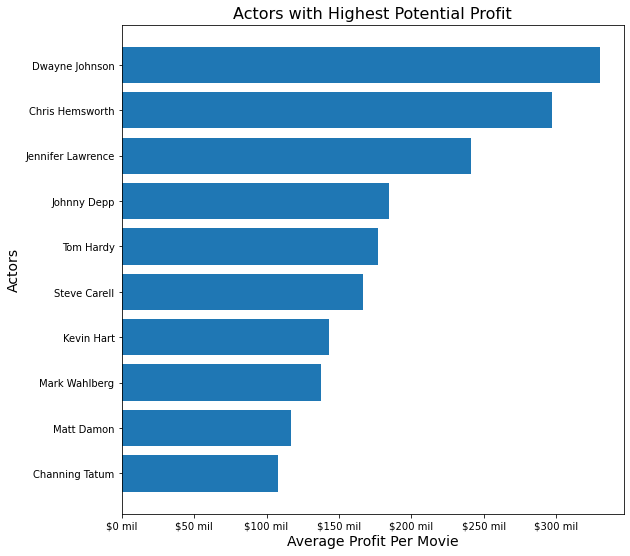

In [334]:
# horizontal bar graph to legibly present all names
# formatted x ticks to million as mil, no decimals, included "$" 
# set appropriate labels, increased font size, reversed y axis

fig, ax = plt.subplots(figsize=(9,9))


x = 'average_profits'
y = 'top_actors'

ax.set_title("Actors with Highest Potential Profit", fontsize=16)
ax.set_xlabel("Average Profit Per Movie", fontsize=14)
ax.set_ylabel("Actors", fontsize=14)

ax.ticklabel_format(axis='x', style='plain')

ax.barh(width=x, y=y, data=actor_profits_df)
ax.invert_yaxis()

ticks_loc = ax.get_xticks().tolist()
ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
label_format = '{:,.0f}'
ax.set_xticklabels([label_format.format(x) for x in ticks_loc])

xlabels = ['${:,.0f}'.format(x) + ' mil' for x in ax.get_xticks()/1000000]
ax.set_xticklabels(xlabels);

## Directors

#### Selecting director data to work from

In [274]:
# joined tables: movie_basics and persons to principals, selected only the matching records.
directors = pd.read_sql(
"""
SELECT
    category,
    pr.movie_id,
    pr.person_id,
    primary_name,
    primary_title 
FROM 
    principals AS pr
JOIN
    movie_basics AS mb using(movie_id)
JOIN
    persons AS pe using(person_id)
WHERE
    category = 'director'
""",conn)
directors

,category,movie_id,person_id,primary_name,primary_title
0,director,tt0111414,nm0398271,Frank Howson,A Thin Life
1,director,tt0323808,nm0362736,Robin Hardy,The Wicker Tree
2,director,tt0417610,nm1145057,Alejandro Chomski,Asleep in the Sun
3,director,tt0469152,nm0707738,Alyssa R. Bennett,Smoking/Non-Smoking
4,director,tt0473032,nm0776090,J. Neil Schulman,Escape from Heaven
...,...,...,...,...,...
146388,director,tt9679036,nm9728620,Julia Beney,"A Girl, a Boy, a Penny and a Very, Very, Very ..."
146389,director,tt9681728,nm10436661,Alexander Zolotukhin,A Russian Youth
146390,director,tt9689618,nm9652770,Xavi Herrero,Moonface. A woman in the war.
146391,director,tt9689618,nm10439725,Xavi Herrero,Moonface. A woman in the war.


In [275]:
# merging "diretors" DataFrame (extracted from "IMDB") with "TheNumbers" DataFrame on 'primary_title' and 'movie'
directors_df = pd.merge(directors,
                  TheNumbers,
                  left_on='primary_title',
                  right_on='movie')

directors_df

,category,movie_id,person_id,primary_name,primary_title,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_margin,worldwide_margin,domestic_roi,worldwide_roi
0,director,tt0475290,nm0001053,Ethan Coen,"Hail, Caesar!",22,"Feb 5, 2016","Hail, Caesar!",22000000,30080225,64160680,8080225,42160680,0.3,0.7,0.4,1.9
1,director,tt0475290,nm0001054,Joel Coen,"Hail, Caesar!",22,"Feb 5, 2016","Hail, Caesar!",22000000,30080225,64160680,8080225,42160680,0.3,0.7,0.4,1.9
2,director,tt10300704,nm10678795,Anbarasan,Walter,96,"Mar 13, 2015",Walter,700000,0,0,-700000,-700000,-inf,-inf,-1.0,-1.0
3,director,tt2016335,nm1457361,Anna Mastro,Walter,96,"Mar 13, 2015",Walter,700000,0,0,-700000,-700000,-inf,-inf,-1.0,-1.0
4,director,tt3558672,nm6315709,Daniela Imhoff,Walter,96,"Mar 13, 2015",Walter,700000,0,0,-700000,-700000,-inf,-inf,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3864,director,tt7961060,nm0619110,Tatsuya Nagamine,Dragon Ball Super: Broly,36,"Jan 16, 2019",Dragon Ball Super: Broly,8500000,30376755,122747755,21876755,114247755,0.7,0.9,2.6,13.4
3865,director,tt6962340,nm3258280,Anand Vrs Tomar,The Touch,10,"Mar 31, 2004",The Touch,20000000,0,5918742,-20000000,-14081258,-inf,-2.4,-1.0,-0.7
3866,director,tt9805168,nm4991904,Janchivdorj Sengedorj,Traitor,25,"Aug 27, 2008",Traitor,22000000,23530831,27882226,1530831,5882226,0.1,0.2,0.1,0.3
3867,director,tt7694546,nm9457387,Zefei Liu,Beowulf,88,"Nov 16, 2007",Beowulf,150000000,82280579,195080579,-67719421,45080579,-0.8,0.2,-0.5,0.3


In [276]:
directors_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3869 entries, 0 to 3868
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category           3869 non-null   object 
 1   movie_id           3869 non-null   object 
 2   person_id          3869 non-null   object 
 3   primary_name       3869 non-null   object 
 4   primary_title      3869 non-null   object 
 5   id                 3869 non-null   int64  
 6   release_date       3869 non-null   object 
 7   movie              3869 non-null   object 
 8   production_budget  3869 non-null   int64  
 9   domestic_gross     3869 non-null   int64  
 10  worldwide_gross    3869 non-null   int64  
 11  domestic_profit    3869 non-null   int64  
 12  worldwide_profit   3869 non-null   int64  
 13  domestic_margin    3869 non-null   float64
 14  worldwide_margin   3869 non-null   float64
 15  domestic_roi       3869 non-null   float64
 16  worldwide_roi      3869 

In [277]:
# used value_counts to select only directors who appeared in at least 5 movies 
# by selecting only directors who appear in at least 5 movies we can provide a highly reliable average
top_reliable_directors = directors_df.value_counts('primary_name').head(28)
top_reliable_directors

primary_name
Tim Story             9
Steven Spielberg      8
David Gordon Green    8
Steven Soderbergh     7
Ridley Scott          7
Denis Villeneuve      6
Jon M. Chu            6
Clint Eastwood        6
Tim Burton            6
Jaume Collet-Serra    6
Peter Berg            6
Zack Snyder           5
Simon West            5
Roland Emmerich       5
David O. Russell      5
Ron Howard            5
Nicholas Stoller      5
Paul W.S. Anderson    5
Paul Feig             5
Robert Rodriguez      5
Danny Boyle           5
Brad Peyton           5
Antoine Fuqua         5
M. Night Shyamalan    5
Francis Lawrence      5
David Ayer            5
Jonathan Levine       5
Guillermo del Toro    5
dtype: int64

In [285]:
# top_actors is now list of top_reliable_actors
top_directors = top_reliable_directors.index.tolist()
top_directors

['Tim Story',
 'Steven Spielberg',
 'David Gordon Green',
 'Steven Soderbergh',
 'Ridley Scott',
 'Denis Villeneuve',
 'Jon M. Chu',
 'Clint Eastwood',
 'Tim Burton',
 'Jaume Collet-Serra',
 'Peter Berg',
 'Zack Snyder',
 'Simon West',
 'Roland Emmerich',
 'David O. Russell',
 'Ron Howard',
 'Nicholas Stoller',
 'Paul W.S. Anderson',
 'Paul Feig',
 'Robert Rodriguez',
 'Danny Boyle',
 'Brad Peyton',
 'Antoine Fuqua',
 'M. Night Shyamalan',
 'Francis Lawrence',
 'David Ayer',
 'Jonathan Levine',
 'Guillermo del Toro']

In [287]:
# used worldwide_profit to find mean of each director in top_directors
avg_profit_of_movie_per_director = []

for director in top_directors:
    director_filter = directors_df.loc[directors_df['primary_name'] == director]
    avg_profit_of_movie_per_director.append(director_filter.worldwide_profit.mean())
    
avg_profit_of_movie_per_director

[48457857.44444445,
 164754974.375,
 42364834.5,
 45581726.85714286,
 176967321.2857143,
 57327861.166666664,
 150242933.66666666,
 137916026.66666666,
 190861143.33333334,
 75478617.16666667,
 34929965.833333336,
 294184022.8,
 38949677.2,
 40345984.4,
 113364526.0,
 62628345.4,
 104627034.8,
 153293991.0,
 174341927.8,
 48152771.4,
 24089305.2,
 185171680.0,
 98183459.2,
 176831934.6,
 404238308.6,
 127467723.4,
 33089379.4,
 97190623.6]

In [280]:
# new DataFrame for top directors and their relative average profit
director_profits_df = pd.DataFrame(list(zip(top_directors, avg_profit_of_movie_per_director)),
               columns =['top_directors', 'average_profits'])

In [281]:
# sorted DataFrame to be in descending order from highest average_profits
director_profits_df.sort_values(by='average_profits', inplace=True, ascending=False)
director_profits_df

,top_directors,average_profits
24,Francis Lawrence,404238308.6
11,Zack Snyder,294184022.8
8,Tim Burton,190861143.3
21,Brad Peyton,185171680.0
4,Ridley Scott,176967321.3
23,M. Night Shyamalan,176831934.6
18,Paul Feig,174341927.8
1,Steven Spielberg,164754974.4
17,Paul W.S. Anderson,153293991.0
6,Jon M. Chu,150242933.7


In [290]:
# narrowed list down to top 10 for bar graph visual
director_profits_df = director_profits_df.head(10)
director_profits_df

,top_directors,average_profits
24,Francis Lawrence,404238308.6
11,Zack Snyder,294184022.8
8,Tim Burton,190861143.3
21,Brad Peyton,185171680.0
4,Ridley Scott,176967321.3
23,M. Night Shyamalan,176831934.6
18,Paul Feig,174341927.8
1,Steven Spielberg,164754974.4
17,Paul W.S. Anderson,153293991.0
6,Jon M. Chu,150242933.7


## Visualizing Potential Impact of Director

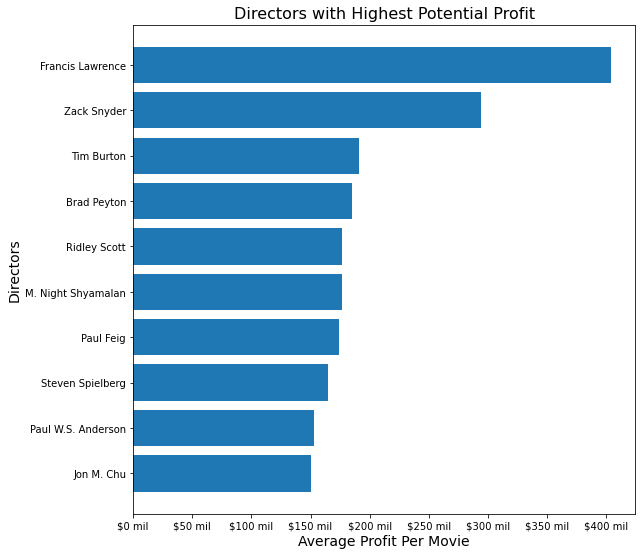

In [337]:
# horizontal bar graph to legibly present all names
# formatted x ticks to million as mil, no decimals, included "$" 
# set appropriate labels, increased font size, reversed y axis

fig, ax = plt.subplots(figsize=(9,9))


x = 'average_profits'
y = 'top_directors'

ax.set_title("Directors with Highest Potential Profit", fontsize=16)
ax.set_xlabel("Average Profit Per Movie", fontsize=14)
ax.set_ylabel("Directors", fontsize=14)

ax.ticklabel_format(axis='x', style='plain')

ax.barh(width=x, y=y, data=director_profits_df)
ax.invert_yaxis()


ticks_loc = ax.get_xticks().tolist()
ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
label_format = '{:,.0f}'
ax.set_xticklabels([label_format.format(x) for x in ticks_loc])

xlabels = ['${:,.0f}'.format(x) + ' mil' for x in ax.get_xticks()/1000000]
ax.set_xticklabels(xlabels);